In [1]:
# pipenv install pandas matplotlib scikit-learn ipywidgets ipykernel seaborn plotly nbformat

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

### Carregar os Dados

In [3]:
df_countries = pd.read_csv(r'.\datasets\countries.csv', sep=';', decimal=',')

In [4]:
# Analizar estrutura
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          165 non-null    object 
 1   child_mort       165 non-null    float64
 2   exports          165 non-null    float64
 3   health           165 non-null    float64
 4   imports          165 non-null    float64
 5   income           165 non-null    int64  
 6   inflation        165 non-null    float64
 7   life_expec       165 non-null    float64
 8   total_fer        165 non-null    float64
 9   gdpp             165 non-null    int64  
 10  income_category  165 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.3+ KB


In [5]:
df_countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Low income
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Upper middle income
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Lower middle income
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Lower middle income
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,High income
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Upper middle income
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Upper middle income
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,High income
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,High income
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Upper middle income


### EDA

### Análise Univariada

In [6]:
# Estatisticas das variáveis

df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.567273,41.193327,6.825576,46.999793,17183.412121,7.585612,70.505455,2.959818,13011.963636
std,40.480851,27.560749,2.759425,24.233083,19389.968166,10.198185,8.935045,1.518166,18428.279743
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.900000,23.800000,4.930000,30.400000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,19.700000,35.000000,6.320000,43.300000,9940.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.200000,51.400000,8.650000,58.900000,22900.000000,10.600000,76.800000,3.910000,14600.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
# Distribuição da variável income_category

percentual_income_category = df_countries.value_counts('income_category') / len(df_countries) * 100
px.bar(percentual_income_category, color=percentual_income_category.index)

In [12]:
# Distriibuição da variavel income_category
px.histogram(df_countries['income'], title="Histograma da variável Income")

In [13]:
# Distribuicao da variavel GDPP
px.histogram(df_countries['gdpp'], title="Histograma da variável GDPP")

In [14]:
# Distribuição da variável Inflation
px.histogram(df_countries['inflation'], title="Histograma da variável Inflation")

In [15]:
# Distribuição da variável Inflation
px.histogram(df_countries['life_expec'], title="Histograma da variável life_expec")

#### Análise Bivariada

In [16]:
# Plot da distribuição por income_category e income

px.box(df_countries, x='income', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [17]:
# Plot da distribuição por income_category e GDPP

px.box(df_countries, x='gdpp', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [ ]:
# Plot da distribuição por income_category e Inflation

px.box(df_countries, x='inflation', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [19]:
# Plot da distribuição por income_category e life_expec

px.box(df_countries, x='life_expec', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [20]:
# Scatterplot de Income e GDPP

px.scatter(df_countries, x='income', y='gdpp', color='income_category', hover_data=['country'])

In [21]:
# Gerar Matriz de Correlação
matriz_correlacao_countries = df_countries.corr(numeric_only=True)

<Axes: >

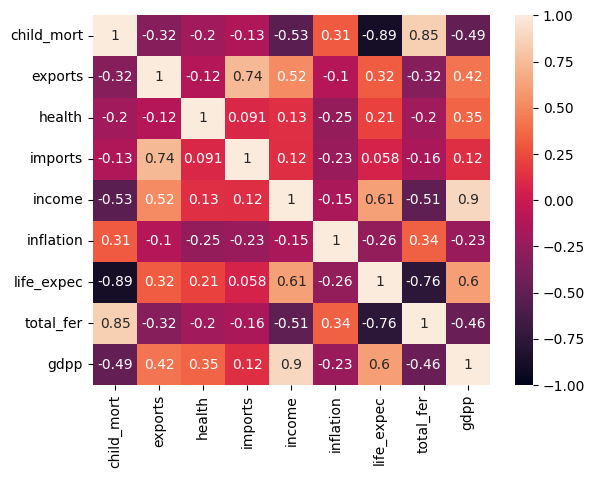

In [23]:
# Plotaar matriz de correlacao
sns.heatmap(matriz_correlacao_countries, vmin=-1, vmax=1, annot=True)

### Treinar Algoritmo PCA

In [25]:
X = df_countries.copy()

X.drop(columns=['country','income_category'], axis=1, inplace=True)

In [30]:
# Separar variaveis quantitativas

numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [31]:
# Definir Tranformer

numeric_tranformer = StandardScaler()

In [32]:
# Criar Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_tranformer, numeric_features)
    ]
)

In [33]:
# Transformar os dados

X_transformed = preprocessor.fit_transform(X)

In [34]:
# Visualizar X_tranformed
X_transformed

array([[ 1.27936799, -1.13524796,  0.2742313 , ..., -1.6059239 ,
         1.88970656, -0.67813658],
       [-0.54431031, -0.48015711, -0.10017109, ...,  0.65049307,
        -0.86538974, -0.48561903],
       [-0.27918316, -0.10166017, -0.96529507, ...,  0.67294498,
        -0.04612849, -0.46548008],
       ...,
       [-0.37829611,  1.12117608,  0.00524318, ...,  0.29126251,
        -0.66718138, -0.63693336],
       [ 0.43938573, -0.40736924, -0.59816262, ..., -0.33739098,
         1.12990782, -0.63693336],
       [ 1.1034425 , -0.15261168, -0.34007942, ..., -2.07741401,
         1.61221484, -0.62876892]], shape=(165, 9))

In [35]:
# Matriz de Covariância

np.cov(X_transformed)

array([[ 1.28101845, -0.30929073, -0.13299078, ..., -0.31162981,
         0.6038062 ,  1.11986219],
       [-0.30929073,  0.19023088,  0.05718309, ...,  0.14855132,
        -0.14287309, -0.40453184],
       [-0.13299078,  0.05718309,  0.3368898 , ...,  0.03260987,
         0.28911912, -0.02412952],
       ...,
       [-0.31162981,  0.14855132,  0.03260987, ...,  0.5954005 ,
        -0.08211639, -0.23881978],
       [ 0.6038062 , -0.14287309,  0.28911912, ..., -0.08211639,
         0.71221987,  0.6856765 ],
       [ 1.11986219, -0.40453184, -0.02412952, ..., -0.23881978,
         0.6856765 ,  1.231984  ]], shape=(165, 165))

In [36]:
# Criar modelo PCA

modelo_pca = PCA(n_components=3)

In [37]:
# Executar PCA

X_pca = modelo_pca.fit_transform(X_transformed)

In [38]:
# Gerar um DF com base nos componentes principais

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

In [39]:
df_pca.head(10)

,PC1,PC2,PC3
0,-2.898491,0.043830,-0.674704
1,0.435969,-0.602095,-0.336181
2,-0.294489,-0.393013,1.237849
3,-2.941128,1.746346,1.498419
4,1.038913,0.117437,-0.255625
5,0.005300,-1.713515,0.990698
6,-0.096950,-0.555750,0.231357
7,2.339830,-1.987538,0.349795
8,2.967046,-0.761415,-0.424208
9,-0.188400,-0.364424,0.896714


In [40]:
# Verificar tamanho do DF_pca
len(df_pca)

165

In [42]:
# Incluir componentes principais no dataframe original
df_countries['PC1'] = df_pca['PC1']
df_countries['PC2'] = df_pca['PC3']
df_countries['PC3'] = df_pca['PC3']

In [43]:
# Mostrar df original com componentes principais
df_countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category,PC1,PC2,PC3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Low income,-2.898491,-0.674704,-0.674704
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Upper middle income,0.435969,-0.336181,-0.336181
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Lower middle income,-0.294489,1.237849,1.237849
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Lower middle income,-2.941128,1.498419,1.498419
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,High income,1.038913,-0.255625,-0.255625
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Upper middle income,0.005300,0.990698,0.990698
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Upper middle income,-0.096950,0.231357,0.231357
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,High income,2.339830,0.349795,0.349795
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,High income,2.967046,-0.424208,-0.424208
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Upper middle income,-0.188400,0.896714,0.896714


### Visualizar Resultados

In [46]:
# Autovetores
autovetores = modelo_pca.explained_variance_

# Autovalores
autovalores = modelo_pca.components_

print(f"Autovetores:\n{autovetores}")
print(f"\nAutovalores:\n{autovalores}")

Autovetores:
[4.18194258 1.55676483 1.15683401]

Autovalores:
[[-0.41944537  0.28242091  0.15068193  0.16069962  0.39721431 -0.20064752
   0.42542863 -0.40370133  0.39213733]
 [ 0.18639458  0.61906392 -0.26537269  0.6623149   0.03301443  0.03814569
  -0.21355639  0.15172601 -0.04196516]
 [-0.02457745  0.11382205 -0.57151155 -0.33939771  0.32266099  0.63616571
   0.11811594  0.02417555  0.14584745]]


In [48]:
# Mostrar chart 3d com os componentes principais

fig = px.scatter_3d(df_countries, x='PC1', y='PC2', z='PC3', color='income_category', title='Visualização PCA', width=800, height=600, hover_data=['country'])
fig.show()

In [49]:
# Reconstruir os dados com base no PCA
X_recovered = modelo_pca.inverse_transform(X_pca)

In [51]:
# Visualizar X_recovered
X_recovered

array([[ 1.24051071, -0.86825694, -0.06278059, ..., -1.32215438,
         1.1604634 , -1.23684957],
       [-0.28682977, -0.28787365,  0.41760377, ...,  0.27434638,
        -0.27548195,  0.14719535],
       [ 0.01984344, -0.18557564, -0.64752426, ...,  0.10485603,
         0.08918105,  0.08154978],
       ...,
       [ 0.06178006,  0.96128084, -0.10287206, ..., -0.12810115,
         0.00487659,  0.08490176],
       [ 0.75967769, -0.43601395, -0.92852836, ..., -0.66251251,
         0.7873269 , -0.57577658],
       [ 1.28114026, -0.48486169, -0.69796675, ..., -1.2880174 ,
         1.23173122, -1.10450882]], shape=(165, 9))

In [52]:
# Calcular o erro de construção

reconstruction_error = mean_squared_error(X_transformed, X_recovered)
print(f"Erro de Construção: {reconstruction_error}")

Erro de Construção: 0.23847219349860982


### Salvar modelo

In [53]:
import joblib
joblib.dump(modelo_pca, ".\modelo_pca_3_componentes.pkl")
joblib.dump(preprocessor, ".\preprocessor_pca.pkl")

['.\\preprocessor_pca.pkl']